# **CIS 520: Machine Learning, Fall 2020**
# **Week 14, Worksheet 1**
## **Autoencoder**


- **Content Creator:** Shaozhe Lyu
- **Content Checkers:** Michael Zhou, Siyun Hu
- **Acknowledgements:** This notebook contains content from the following sources:
  [Independent Component Analysis](https://towardsdatascience.com/independent-component-analysis-ica-in-python-a0ef0db0955e)

   [FastICA on 2D point clouds](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#sphx-glr-auto-examples-decomposition-plot-ica-vs-pca-py)

   [PCA and ICA on image](https://github.com/pablodecm/SepFuentes/blob/master/SepFuentes.ipynb)


# Question:
As you go through the worksheet, please think about what is similar acrorss PCA, ICA and AE, and what is different.

We will start by importing all necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA

# 1. Principal Component Analysis (PCA)

PCA, as we learned, is an orthogonal linear transformation that minimizes reconstruction error by putting basis vectors in the directions of  maximal covariance.

You can review PCA from [this worksheet](https://colab.research.google.com/drive/1Rq7QlCjnqQN_c4e-T2nToBRwbiJS9HCj#scrollTo=AdZDGT6aqEj3) 




In [ ]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver((0, 0), (0, 0), x_axis, y_axis, zorder=11, width=0.01,
                       scale=6, color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

Next, we will calculate the PCA decomposition:

In [ ]:
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

We will then plot the orthogonal direction from our PCA decomposition:

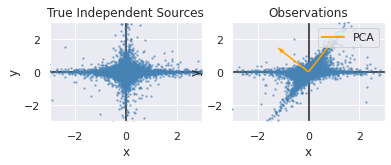

In [ ]:
plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.show()

# 2. Independent Component Analysis (ICA)
======

ICA is a computational method for separating a multivariate signal into its underlying components. Using ICA, we can extract the desired component (i.e. conversation between you and some else) from the amalgamation of multiple signals.





1. Center x by subtracting the mean
2. Whiten x
3. Choose a random initial value for the de-mixing matrix w
4. Calculate the new value for w
5. Normalize w
6. Check whether algorithm has converged and if it hasn’t, return to step 4
7. Take the dot product of w and x to get the independent source signals


In [ ]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

PCA decomposition


In [ ]:

from sklearn.decomposition import PCA, FastICA


ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

The images below plot the different sample by PCA and ICA

In [ ]:


plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

As we can see from the image, ICA is a algorithm that finds directions in the feature space corresponding to projections with high non-Gaussianity. These directions need not be orthogonal in the orginal feature space, but they are orthogonal in the whitened feature space.


PCA finds orthogonal directions in the raw feature space that corresponding to directions accounting for maximum variance

# 3. PCA and ICA for Image Processing 

PCA and ICA both are statistical transformations

In [ ]:
!git clone https://github.com/pablodecm/SepFuentes.git
%cd SepFuentes/

Cloning into 'SepFuentes'...
remote: Enumerating objects: 46, done.
remote: Total 46 (delta 0), reused 0 (delta 0), pack-reused 46
Unpacking objects: 100% (46/46), done.
/content/SepFuentes/SepFuentes


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import sympy
sympy.init_printing(use_latex='mathjax')

For this exercise, we will start by plotting mixed pictures:

Text(0.5, 1.0, 'Mixed Image 3')

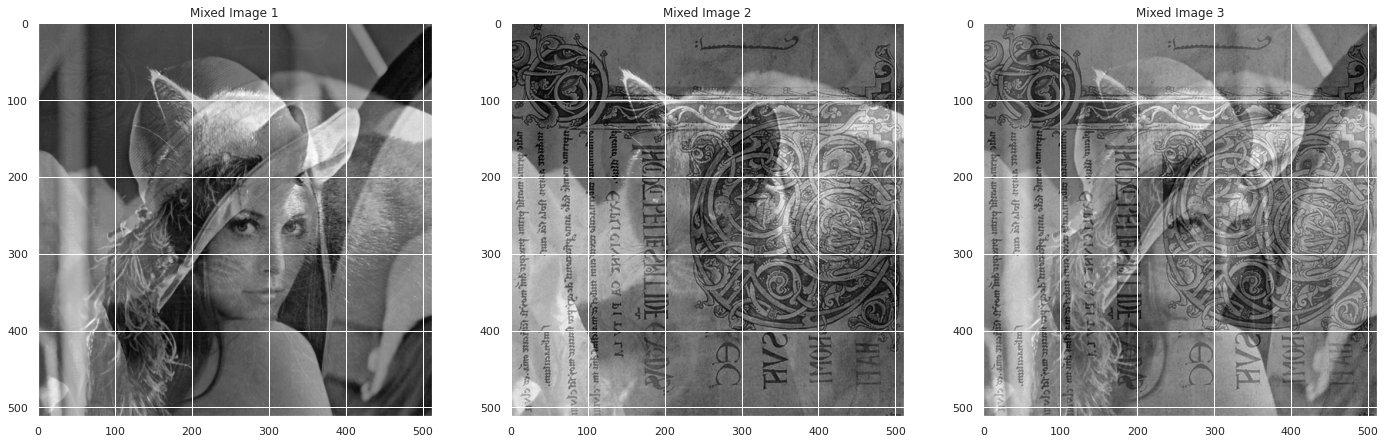

In [ ]:
img_1 = np.genfromtxt('imagen_mezclada_uno.dat', dtype='float64')
img_2 = np.genfromtxt('imagen_mexclada_dos.dat', dtype='float64')
img_3 = np.genfromtxt('imagen_mexclada_tres.dat', dtype='float64')

f, (ax1,ax2,ax3) = plt.subplots(1,3)
f.set_size_inches((24,40))
ax1.imshow(img_1, cmap=plt.cm.gray)
ax1.set_title("Mixed Image 1")
ax2.imshow(img_2, cmap=plt.cm.gray)
ax2.set_title("Mixed Image 2")
ax3.imshow(img_3, cmap=plt.cm.gray)
ax3.set_title("Mixed Image 3")

In [ ]:
# each image is flattened and all three are stacked together
Y = np.vstack((img_1.flatten(),img_2.flatten(),img_3.flatten()))
Y.shape
Y.reshape((512,512,3)).shape

(512, 512, 3)

Stacking all three images together, we get the following mixed image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


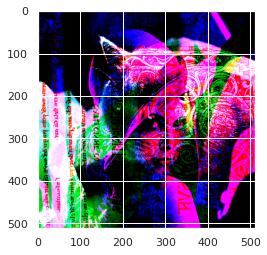

In [ ]:
plt.imshow(np.transpose(Y).reshape((512,512,3)), vmin=0, vmax=1)

The PCA decomposition for the mixed image is shown below.

PCA has partially, but not completely, separated the images. The third component is a combination of the young woman and the cat. We can also obtain the percentage of  the variance explained by each component using the eigenvalues:

Text(0.5, 1.0, 'Componente Principal 3')

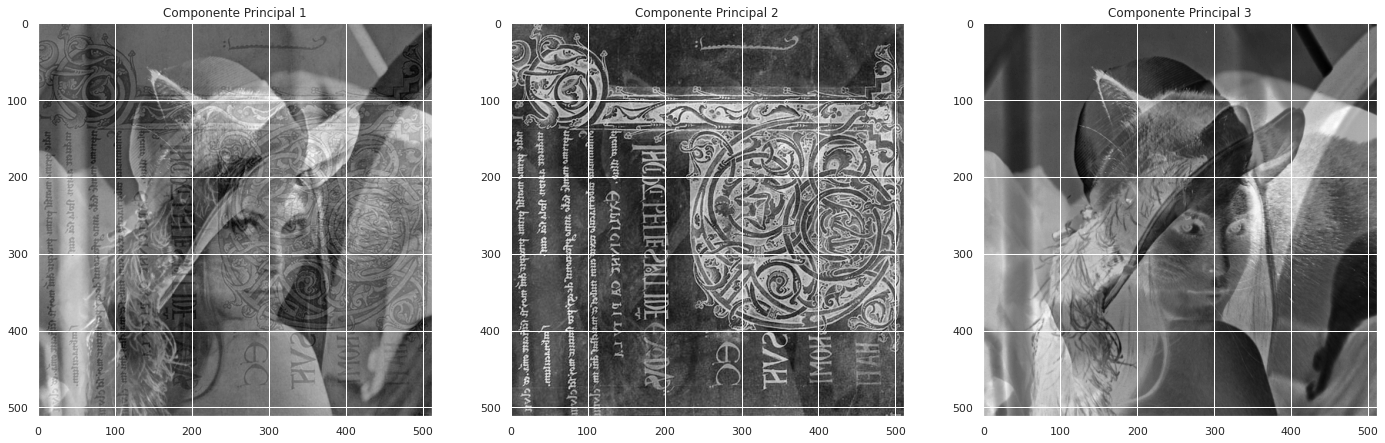

In [ ]:
pca = decomposition.PCA(n_components=3)
img_pca= pca.fit_transform(Y.T)

f, (ax1,ax2,ax3) = plt.subplots(1,3)
f.set_size_inches((24,40))
ax1.imshow(img_pca[:,0].reshape((512,512)), cmap=plt.cm.gray)
ax1.set_title("Componente Principal 1")
ax2.imshow(img_pca[:,1].reshape((512,512)), cmap=plt.cm.gray)
ax2.set_title("Componente Principal 2")
ax3.imshow(img_pca[:,2].reshape((512,512)), cmap=plt.cm.gray)
ax3.set_title("Componente Principal 3")

The ICA decomposition for the mixed image is shown below.


ICA does a good job separating the components that were mixed in the images.  The color of the second component color is inverted, which is not surprising since the ICA components can be multiplied by a scalar (negative  in this case) or commuted. The mixing matrix $ \mathbf {A}_{ICA } $ in this case can  be estimated as:

Text(0.5, 1.0, 'Componente Independiente 3')

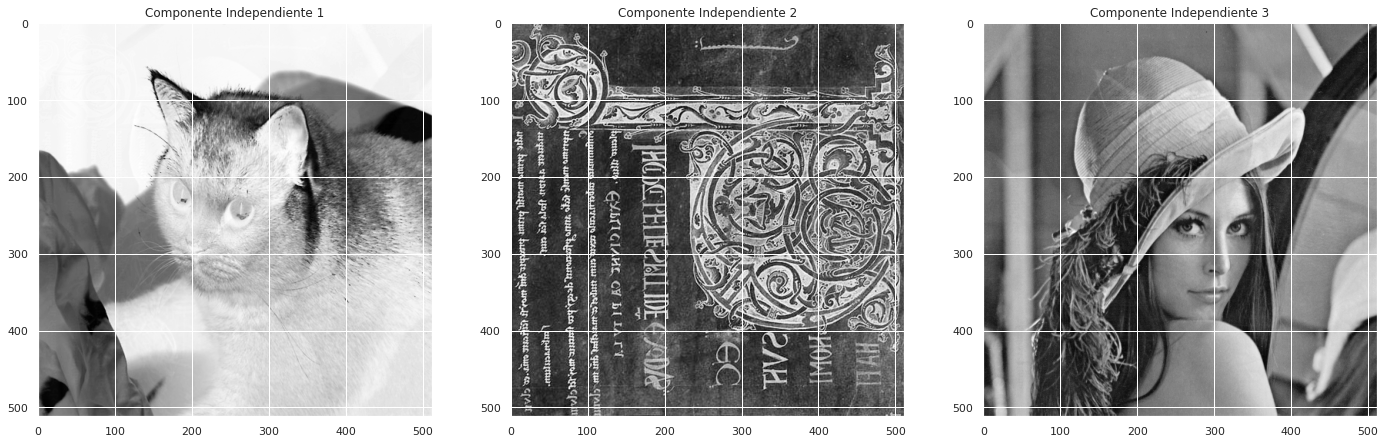

In [ ]:
np.random.seed(27)

ica = decomposition.FastICA(n_components=3)
img_ica= ica.fit_transform(Y.T)

f, (ax1,ax2,ax3) = plt.subplots(1,3)
f.set_size_inches((24,40))
ax1.imshow(img_ica[:,0].reshape((512,512)), cmap=plt.cm.gray)
ax1.set_title("Componente Independiente 1")
ax2.imshow(img_ica[:,1].reshape((512,512)), cmap=plt.cm.gray)
ax2.set_title("Componente Independiente 2")
ax3.imshow(img_ica[:,2].reshape((512,512)), cmap=plt.cm.gray)
ax3.set_title("Componente Independiente 3")

In [ ]:
sympy.Eq( sympy.MatrixSymbol("\mathbf{A}_{ICA}",3,3),
         sympy.Matrix(ica.mixing_.round(decimals=4)))

                   ⎡-566.9308   75.3859   675.8539⎤
                   ⎢                              ⎥
\mathbf{A}_{ICA} = ⎢-241.3357  -183.6017  -37.1631⎥
                   ⎢                              ⎥
                   ⎣-419.1685  -580.6624  630.7346⎦

We tried to separate three linearly mixed images into their components.

PCA transformed the data to a new basis in which the new components are uncorrelated. It only partially separates the images.

ICA is better at identifying the original components, up to multiplicative constants and switching.

Which one will in general give lowest reconstruction error?

 4.Variational Autoencoders (VAEs)
======

The VAE implemented here uses a standard setup: a multivariate Normal distribution for the conditional distribution of the latent vectors given and input image ($q_{\phi}(z | x_i $) in the slides) and a multivariate Bernoulli distribution for the conditional distribution of images given the latent vector ($p_{\theta}(x | z)$ in the slides). Using a Bernoulli distribution, the reconstruction loss (negative log likelihood of a data point in the output distribution) reduces to the pixel-wise binary cross-entropy. See the [original VAE paper](https://arxiv.org/pdf/1312.6114.pdf), Appendix C.1 for details.

## Load data

In [ ]:
import torch
import torchvision
import h5py
import numpy as np
import torchvision.transforms as transforms
from torchvision.models.detection.image_list import ImageList 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torchvision.utils as vutils
torchvision.datasets.MNIST('.', download=True)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw





Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## VAE network

In [ ]:
class VAE(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(784, 400)
    self.fc2a = torch.nn.Linear(400, 20)
    self.fc2b = torch.nn.Linear(400, 20)
    self.fc3 = torch.nn.Linear(20,400)
    self.fc4 = torch.nn.Linear(400,784)
    self.relu = torch.nn.ReLU()
    self.sig = torch.nn.Sigmoid()

  def forward(self, X):
    mu,sigma = self.encoder(X)
    x = self.reparameter(mu,sigma)
    x = self.decoder(x)
    return x,mu,sigma
  
  def encoder(self,x):
    x = self.relu(self.fc1(x))
    mu = self.fc2a(x)
    sigma = self.fc2b(x)
    return mu,sigma

  def decoder(self,x):
    x = self.relu(self.fc3(x))
    x = self.sig(self.fc4(x))
    return x
  
  def reparameter(self,mu,sigma):
    if torch.cuda.is_available():
      eps = torch.empty_like(sigma).normal_().cuda()
    else:
      eps = torch.empty_like(sigma).normal_()  
    
    new_eps = torch.mul(eps,torch.exp(0.5*sigma)) + mu
    return new_eps

## VAE loss
The loss function for training VAEs contains two parts:

1) A reconstruction error that pushes the reconstructed outputs to be close  to the inputs. 

2) A Kullback-Leibler (KL) divergence, which pushes the latent space to be a Gaussian distribution which we will sample from during inference. 
The VAE formulation is as follows: 

  $\log P(x)− KL[Q(z|x)||P(z|x)] = E_{z∼Q}[log P(x|z)] − KL[Q(z|x)||P(z|x)]$  


where $E_{z∼Q}[log P(x|z)]$ is the log-likelihood modeled by the decoder, and the KL term refers to Kullback-Leibler divergence between the posterior distribution Q(z|x) modeled by the encoder and the prior distribution P(z). In VAE, we assume P(z) is a normal distribution N(0, 1) and the encoder estimates a mean µ(x) and standard deviation σ(x) to approximate the posterior normal distribution Q, where Q(z|x) = Q(z|µ(x), σ(x))

In [ ]:
class VAE_loss(torch.nn.Module):
  def __init__(self):
    super().__init__()  

  def forward(self,pred_x,x,mu,sigma):
    log_loss = self.log_loss(pred_x,x)
    KLD_loss = self.KLD_loss(mu,sigma)
    loss = log_loss + KLD_loss
    return  loss,log_loss,KLD_loss

  def log_loss(self,pred_x,x):
    # x = x.detach()
    bce = torch.nn.MSELoss(reduction='sum')
    # bce = torch.nn.BCELoss(reduction='sum')
    
    log_loss = bce(pred_x,x)
    return log_loss
  
  def KLD_loss(self,mu,sigma):
    sigma2 = torch.exp(sigma)
    mu2 = torch.pow(mu,2)
    kld_loss = -0.5*torch.sum(1+sigma-mu2-sigma2)
    return kld_loss

## Train the model

In [ ]:
def curve_plt(epoch,train_loss,test_loss,name = ''):
  plt.figure(1)
  # plt.subplot(2,1,1)
  plt.gca()
  plt.plot(epoch,train_loss,color='r', linewidth=1, alpha=0.6,label='train'+name+'_loss')
  plt.plot(epoch,test_loss,color='b', linewidth=1, alpha=0.6,label='test'+name+'_loss')
  plt.xlabel('epoch')
  plt.ylabel(name+'loss')
  plt.legend()
  plt.show()

In [ ]:
BATCH_SIZE = 128

train_mnist = torchvision.datasets.MNIST(root = '.',train = True,
                      transform=torchvision.transforms.Compose([
                          torchvision.transforms.ToTensor()]
                      ))
train_loader = torch.utils.data.DataLoader(dataset = train_mnist,batch_size = BATCH_SIZE,shuffle = True)
test_mnist = torchvision.datasets.MNIST(root = '.',
                    train = False,
                    transform=torchvision.transforms.Compose([
                        torchvision.transforms.ToTensor()]
                    ))
test_loader = torch.utils.data.DataLoader(dataset = test_mnist,batch_size = BATCH_SIZE,shuffle = True)


In [ ]:
def train(epoch):
  train_per_loss = 0
  train_per_log_loss = 0
  train_per_kld_loss = 0
  vae_network.train()
  for i,(train_x,train_y) in enumerate(train_loader):
    # inputs = torch.autograd.Variable(train_x.view(len(train_x),1,784)/255).cuda()
    inputs = torch.autograd.Variable(train_x.view(len(train_x),1,784)).cuda()
    label = torch.autograd.Variable(train_y).cuda()
    optimizer.zero_grad()
    output,mu,sigma = vae_network(inputs)
    loss,log_loss,KLD_loss = criterion(output,inputs,mu,sigma)
    loss.backward()
    optimizer.step()
    train_per_loss = train_per_loss + loss.item()
    train_per_log_loss = train_per_log_loss + log_loss.item()
    train_per_kld_loss = train_per_kld_loss + KLD_loss.item()
    if i%1000 == 999:
      print('%5d: Loss: %.3f,log_Loss: %.3f,klf_Loss: %.3f'%(i,loss.item(),log_loss.item(),KLD_loss.item()))
  return train_per_loss,train_per_log_loss,train_per_kld_loss

In [ ]:
def test():
  test_per_loss = 0
  test_per_log_loss = 0
  test_per_kld_loss = 0
  vae_network.eval()
  with torch.no_grad():
    for i,(test_x,test_y) in enumerate(test_loader):
      # inputs = torch.autograd.Variable(test_x.view(len(test_x),1,784)/255).cuda()
      inputs = torch.autograd.Variable(test_x.view(len(test_x),1,784)).cuda()
      label = torch.autograd.Variable(test_y).cuda()
      output,mu,sigma = vae_network(inputs)
      loss,log_loss,KLD_loss = criterion(output,inputs,mu,sigma)
      test_per_loss = test_per_loss + loss.item()
      test_per_log_loss = test_per_log_loss + log_loss.item()
      test_per_kld_loss = test_per_kld_loss + KLD_loss.item()
      if i%1000 == 999:
        print('%5d: Loss: %.3f'%(i,loss.item()))
  return test_per_loss,test_per_log_loss,test_per_kld_loss

In [ ]:
## fixed image
for i,(test_x,test_y) in enumerate(test_loader):
  inputs = torch.autograd.Variable(test_x.view(len(test_x),1,784)).cuda()
  break
fixed_input_36 = inputs[:36]
fixed_input_6 = inputs[:6]

In [ ]:
vae_network = VAE()
if torch.cuda.is_available():
  vae_network = vae_network.cuda()

criterion = VAE_loss()
optimizer = torch.optim.Adam(vae_network.parameters(),lr = 0.001,weight_decay=1e-5)
num_epochs = 20

# init list
train_loss = []
train_log_loss = []
train_kld_loss = []
test_loss = []
test_log_loss = []
test_kld_loss = []
epoch_set = []

fix_6 = torch.Tensor([])
for epoch in range(num_epochs):
  epoch_set.append(epoch+1)
  # train 
  train_per_loss,train_per_log_loss,train_per_kld_loss = train(epoch)
  train_loss.append(train_per_loss/len(train_loader))
  train_log_loss.append(train_per_log_loss/len(train_loader))
  train_kld_loss.append(train_per_kld_loss/len(train_loader))

  test_per_loss,test_per_log_loss,test_per_kld_loss = test()
  test_loss.append(test_per_loss/len(test_loader))
  test_log_loss.append(test_per_log_loss/len(test_loader))
  test_kld_loss.append(test_per_kld_loss/len(test_loader))

  if epoch %3 ==2:
    output,mu,sigma = vae_network(fixed_input_6)
    fix_6 = torch.cat((fix_6,output.cpu()),dim=0)

k = 1
curve_plt(epoch_set[k:],train_loss[k:],test_loss[k:],name = '')
curve_plt(epoch_set[k:],train_log_loss[k:],test_log_loss[k:],name = '_log')
curve_plt(epoch_set[k:],train_kld_loss[k:],test_kld_loss[k:],name = '_kld')


## decode and plot

In [ ]:
import numpy as np
total_img_size = 20 

mean_data = np.linspace(-3, 3, total_img_size)
std_data = np.linspace(-3, 3, total_img_size)
vae_network.eval()
img_size = 28
new_img = np.zeros((img_size*total_img_size,img_size*total_img_size))
for i, yi in enumerate(mean_data):
  for j, xi in enumerate(std_data):
    m = vae_network.decoder(torch.empty(1, 1, 20).normal_(mean = xi,std = yi**2).cuda())
    m_ij = m.reshape(1,1,28,28).squeeze(0).squeeze(0).cpu().detach()
    new_img[i*img_size:(i+1)*img_size,j*img_size:(j+1)*img_size] = m_ij
plt.imshow(new_img)

In [ ]:
img = vutils.make_grid(fixed_input_6.reshape(-1,1,28,28),nrow = 6,normalize=True).cpu()
plt.imshow(img.permute(1,2,0).detach().numpy())
plt.show()
img = vutils.make_grid(fix_6.reshape(-1,1,28,28),nrow = 6,normalize=True).cpu()
plt.imshow(img.permute(1,2,0).detach().numpy())
plt.show()


In [ ]:
img = vutils.make_grid(fixed_input_36.reshape(-1,1,28,28),nrow = 6,normalize=True).cpu()
plt.imshow(img.permute(1,2,0).detach().numpy())
plt.show()
output,mu,sigma = vae_network(fixed_input_36)
img = vutils.make_grid(output.reshape(-1,1,28,28),nrow = 6,normalize=True).cpu()
plt.imshow(img.permute(1,2,0).detach().numpy())
plt.show()

# Conclusion

PCA, ICA, and autoencoders all do decomposition.  Which are linear? Which nonlinear?

PCA finds orthogonal directions in the raw feature space that corresponding to directions accounting for maximum variance. It is linear.

ICA finds directions in the feature space that are far  from Gaussian (that stick out). These directions need not be orthogonal in the orginal feature space, but they are orthogonal in the whitened feature space. It is also linear.

VAE provides a non-linear decomposition for the image, decomposing it (in the example we saw) into two dimension with an encoder, and then reconstructing it with a decoder. 
